In [ ]:
sample = dataset[2]

image = sample['image']
label = sample['label']

label.shape

In [ ]:
slice_0 = image[144, :, :]
slice_1 = label[144, :, :]

show_slices([slice_0, slice_1])
plt.suptitle("Center slices for EPI image")  

In [ ]:
root_dir="data/ct_mr_train"
modality = "MR"
if modality=="MR":
    images_path="mr_train"
    images_list="mr_train.csv"

elif modality=="CT":
    images_path="ct_train"
    images_list="ct_train.csv"

basic_transforms = transforms.Compose([
            transforms.ToPILImage(mode='I'),
            transforms.CenterCrop(size=256),
            transforms.ToTensor()
            ])

rotation_angle = 15
shift_range = [0.3,0.3]
shear_range = 0.1
zoom_range = 1.4

basic_augmentations = {'rotation_angle': rotation_angle, 'shift_range': shift_range, 'shear_range': shear_range, 'zoom_range': zoom_range }

dataset = slicer.CT_MR_Train(root_dir,modality,images_path,images_list,transform=basic_transforms, augment_param=basic_augmentations)
print("All ok: ", len(dataset))

In [1]:
import slicer
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import random

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision.transforms.functional as TF

import nibabel as nib

import matplotlib.pyplot as plt


In [12]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [13]:
from data_loader import CT_MR_Dataset, Two_idx_RandomSampler, Two_idx_BatchSampler
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [14]:
source_path = "data/ct_mr_train/pre_processed/mr_train_processed.csv"
target_path="data/ct_mr_train/pre_processed/ct_train_processed.csv"

rotation_angle = 15
shift_range = [0.3,0.3]
shear_range = 0.1
zoom_range = 1.3

basic_augmentations = {'rotation_angle': rotation_angle,
                       'shift_range': shift_range,
                       'shear_range': shear_range,
                       'zoom_range': zoom_range }

dataset = CT_MR_Dataset(source_path, target_path, augment_param=basic_augmentations)

sizes = len(dataset)

print("Length of dataset: ", dataset._length_())


Length of dataset:  (1371, 3668)


In [15]:
two_idx_sampler = Two_idx_RandomSampler(dataset)
two_idx_batch_sampler = Two_idx_BatchSampler(two_idx_sampler, batch_size=1, drop_last=False)

dataloader = DataLoader(dataset, batch_sampler=two_idx_batch_sampler)

gt shapes before:  torch.Size([1, 256, 256]) torch.Size([1, 256, 256])
gt shapes after:  torch.Size([5, 256, 256]) torch.Size([5, 256, 256])
0 / 1371


TypeError: Invalid shape (256, 256, 1, 1) for image data

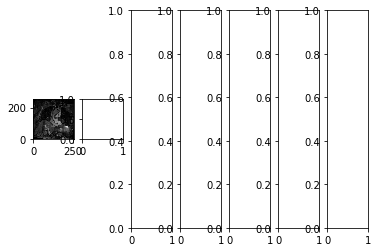

In [16]:
count = 0

for i_batch, sample_batched in enumerate(dataloader):
    
    count += 1
    if count > 5:
        break
    
    print(i_batch,"/",len(two_idx_batch_sampler))

    image = sample_batched['image_source']
    label = sample_batched['gt_source']
    actual = sample_batched['actual_gt_source']
    
        
    slice_0 = image[0, 0, :, :]
    actual_0 = actual[0,0,:,:]
    label_0 = label[0, 0 , :, :]
    label_1 = label[0, 1 , :, :]
    label_2 = label[0, 2 , :, :]
    label_3 = label[0, 3 , :, :]
    label_4 = label[0, 4 , :, :]
    show_slices([slice_0, actual_0, label_0, label_1, label_2, label_3, label_4])
    plt.suptitle("Center slices for EPI image")  
